In [197]:
import numpy as np
import random as rand
import math
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout
from keras.models import Model, Sequential
from keras.initializers import glorot_uniform
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import os
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from random import sample
import timeit
from contextlib import redirect_stdout
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import csv

from keras.datasets import fashion_mnist, mnist
from keras.utils.np_utils import to_categorical
import numpy as np
from keras import backend as K

from keras.callbacks import EarlyStopping

In [259]:
names_t = ['T_F2{-1})', 'T_F2{-0.1})','T_F2{-0.01}', 'T_F2{-0.005}']

#'T_F2{-1_norm}', 'T_F2{-0.5_norm}', 'T_F2{-0.1_norm}','T_F2{-0.05_norm}', 'T_F2{-0.01_norm}']
accuracy_mean_t = [np.mean([89, 87.8, 87, 89]),      
            np.mean([88, 87.8, 87, 89]), 
            np.mean([88.2, 88.4, 87, 88.6]),
            np.mean([88.2, 89, 87.4, 88.6])]


#np.mean([88.6, 86.2, 88.8]),np.mean([87.4, 87.6]),np.mean([87.2, 86, 89.6]),
#np.mean([86.6, 87.8, 89]),np.mean([86, 89])]

total_train_time_mean_t = [np.mean([14.45, 21.47, 27.8, 29.7]),                
            np.mean([33.2, 74.4, 37.3, 39.8]), 
            np.mean([55.8, 73.7, 37.71, 91]),              
            np.mean([48.9, 59, 164, 106])]

#np.mean([25.7, 36.7, 41.78]),np.mean([42.3, 64]),np.mean([42.1, 40.5, 49.12]),
#np.mean([39.6, 55, 39.8]),np.mean([68, 131])]

parameters_mean_t = [np.mean([57, 413, 264, 22]),        
            np.mean([69, 58, 119, 289]), 
            np.mean([38, 114, 78, 109]), 
            np.mean([109, 84, 281, 439])]


#np.mean([132, 96, 64]),np.mean([100, 77]),np.mean([69, 21, 78]),np.mean([46, 25, 132]),np.mean([233, 136])]


predict_time_mean_t = [np.mean([0.104, 0.073, 0.58, 0.04]),   
            np.mean([0.17, 0.38, 0.262, 0.095]), 
            np.mean([0.13, 1.01, 0.128, 0.28]), 
            np.mean([0.39, 0.3, 1.35, 0.43])]

#np.mean([0.17, 0.046, 0.183]),np.mean([0.3, 0.21]),np.mean([0.22, 0.13, 0.14]),
#np.mean([0.061, 0.17, 0.65, 0.147]),np.mean([0.17, 1.01])]

accuracy_std_t = [np.std([89, 87.8, 87, 89]), 
            np.std([88, 87.8, 87, 89]), 
            np.std([88.2, 88.4, 87, 88.6]),
            np.std([88.2, 89, 87.4, 88.6])]
                  
#np.std([88.6, 86.2, 88.8]),np.std([87.4, 87.6]),np.std([87.2, 86, 89.6]),np.std([86.6, 87.8, 89]),       
#np.std([86, 89])]

total_train_time_std_t = [np.std([14.45, 21.47, 27.8, 29.7]), 
            np.std([33.2, 74.4, 37.3, 39.8]), 
            np.std([55.8, 73.7, 37.71, 91]),              
            np.std([48.9, 59, 164, 106])]

#np.std([25.7, 36.7, 41.78]),np.std([42.3, 64]),np.std([42.1, 40.5, 49.12]),
#np.std([39.6, 55, 39.8]),np.std([68, 131])]

parameters_std_t = [np.std([57, 413, 264, 22]),       
            np.std([69, 58, 119, 289]), 
            np.std([38, 114, 78, 109]), 
            np.std([109, 84, 281, 439])]
#np.std([132, 96, 64]),np.std([100, 77]), np.std([69, 21, 78]),np.std([46, 25, 132]),np.std([233, 136])]


predict_time_std_t = [np.std([0.104, 0.073, 0.58, 0.04]), 
            np.std([0.17, 0.38, 0.262, 0.095]), 
            np.std([0.13, 1.01, 0.128, 0.28]), 
            np.std([0.39, 0.3, 1.35, 0.43])]

#np.std([0.17, 0.046, 0.183]),np.std([0.3, 0.21]),np.std([0.22, 0.13, 0.14]),np.std([0.061, 0.65, 0.147]),
#np.std([0.17, 0.51])]

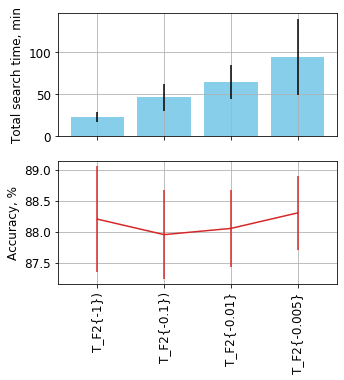

In [260]:
color_palette = ['skyblue','lightpink','brown', 'blue', 'lightgreen', 'magenta', 'grey', 'orange', 'green']


fig, axs = plt.subplots(2, 1, sharex=True, figsize=(5, 5))
# Remove horizontal space between axes
#fig.subplots_adjust(hspace=1)

# Plot each graph, and manually set the y tick values
color = 'skyblue'
axs[0].bar(names_t, total_train_time_mean_t, yerr=total_train_time_std_t, color=color)
axs[0].tick_params(axis='y', labelsize = 12)
axs[0].set_ylabel('Total search time, min', fontsize=12 )

color = 'tab:red'
axs[1].errorbar(names_t, accuracy_mean_t,accuracy_std_t, color=color)
axs[1].tick_params(axis='y', labelsize = 12)
axs[1].set_ylabel('Accuracy, %', fontsize=12 )

axs[1].set_xticklabels(names_t, rotation=90, size = 12)

axs[0].grid()
axs[1].grid()
plt.savefig('fit2_comarison.png', dpi = 300, bbox_inches="tight")
plt.show()

In [220]:
names = ['R^F1', 'T^F1', 'T^E^F1', 'G^F1',  'T^G^F1', 'T^E^F2{-1}', 'T^G^E^F2{-1}', 
         'T^F2n{-1}', 'T^E^F2n{-1}', 'T^G^E^F2n{-1}', 'T^F2n{-0.01}']

title = 'Fashon_MNIST'
accuracy_mean = [np.mean([86.8,88, 89, 89]), 
            np.mean([88.2, 88.2, 89.8, 88.4]), 
            np.mean([87.8, 89.8, 89.8, 90.8]), 
            np.mean([85, 87.8, 89.6, 88.2]), 
            np.mean([87.8, 89.8, 89.8, 90.8]), 
            np.mean([89, 86, 88.4, 88.2, 87.4, 88.2, 89.6, 86]), 
            np.mean([88.6,89, 86.8, 86, 87.6, 86.8, 89, 87.6]),
            np.mean([86.4, 87.6, 87.6, 86.6]), 
            np.mean([86.2, 87.6, 86.8, 87]), 
            np.mean([87.4, 86.4, 87, 86]),
            np.mean([87.8, 87.6, 88.8, 86.6])]

total_train_time_mean = [np.mean([69.37, 77, 65]), 
            np.mean([79.29, 30.45, 43.98]), 
            np.mean([55.25, 68.11, 61.77]), 
            np.mean([102, 127.64, 52.21]), 
            np.mean([73.86, 86.12, 87.1]), 
            np.mean([39.85, 55.93, 27.87, 38.37, 27.3]), 
            np.mean([45.68, 47.26, 62.81, 62.81, 63.12, 69.2]),
            np.mean([18.52, 26.91, 21.94, 33.02]), 
            np.mean([26.16, 27.75, 22.6, 27.49]), 
            np.mean([35.8, 40.58, 45.7, 28.6]),
            np.mean([43.2, 41.6, 45.7, 77.65])]

parameters_mean = [np.mean([528, 42, 47, 113]), 
            np.mean([13, 70, 15, 108]), 
            np.mean([517, 118, 3222, 63]), 
            np.mean([55, 19, 13460, 6435]), 
            np.mean([517, 118, 3222, 63]), 
            np.mean([50, 27, 232, 29, 42, 29, 57, 33]), 
            np.mean([1074, 264, 169, 128, 812, 102, 204, 455]),
            np.mean([191, 115, 139, 835]), 
            np.mean([71, 86, 127, 452]), 
            np.mean([62, 80, 21, 927]),
            np.mean([35, 107, 269, 1015])]

predict_time_mean = [np.mean([0.28, 0.12, 0.101]), 
            np.mean([1.444, 0.19, 0.06]), 
            np.mean([0.43, 0.11, 0.96]), 
            np.mean([0.219, 0.24, 0.18]), 
            np.mean([0.307, 0.28, 0.19]), 
            np.mean([0.41, 0.156, 0.436, 0.25, 0.084]), 
            np.mean([0.367, 0.164, 0.24, 0.228, 0.18, 0.42]), 
            np.mean([0.31, 0.082, 0.2, 0.13]), 
            np.mean([0.56, 0.183, 0.36, 0.26]), 
            np.mean([0.078, 0.21, 0.05, 0.14]),
            np.mean([0.12, 0.17, 0.14, 0.36])]         

accuracy_std = [np.std([86.8,88, 89, 89]), 
            np.std([88.2, 88.2, 89.8, 88.4]), 
            np.std([87.8, 89.8, 89.8, 90.8]), 
            np.std([85, 87.8, 89.6, 88.2]), 
            np.std([87.8, 89.8, 89.8, 90.8]), 
            np.std([89, 86, 88.4, 88.2, 87.4, 88.2, 89.6, 86]), 
            np.std([88.6,89, 86.8, 86, 87.6, 86.8, 89, 87.6]),
            np.std([86.4, 87.6, 87.6, 86.6]), 
            np.std([86.2, 87.6, 86.8, 87]), 
            np.std([87.4, 86.4, 87, 86]),
            np.std([87.8, 87.6, 88.8, 86.6])]
                
total_train_time_std = [np.std([69.37, 77, 65]), 
            np.std([79.29, 30.45, 43.98]), 
            np.std([55.25, 68.11, 61.77]), 
            np.std([102, 127.64, 52.21]), 
            np.std([73.86, 86.12, 87.1]), 
            np.std([39.85, 55.93, 27.87, 38.37, 27.3]), 
            np.std([45.68, 47.26, 62.81, 62.81, 63.12, 69.2]),
            np.std([18.52, 26.91, 21.94, 33.02]), 
            np.std([26.16, 27.75, 22.6, 27.49]), 
            np.std([35.8, 40.58, 45.7, 28.6]),
            np.std([43.2, 41.6, 45.7, 77.65])]            
                        
parameters_std = [np.std([528, 42, 47, 113]), 
            np.std([13, 70, 15, 108]), 
            np.std([517, 118, 3222, 63]), 
            np.std([55, 19, 13460, 6435]), 
            np.std([517, 118, 3222, 63]), 
            np.std([50, 27, 232, 29, 42, 29, 57, 33]), 
            np.std([1074, 264, 169, 128, 812, 102, 204, 455]),
            np.std([191, 115, 139, 835]), 
            np.std([71, 86, 127, 452]), 
            np.std([62, 80, 21, 927]),
            np.std([35, 107, 269, 1015])]

predict_time_std = [np.std([0.28, 0.12, 0.101]), 
            np.std([1.444, 0.19, 0.06]), 
            np.std([0.43, 0.11, 0.96]), 
            np.std([0.219, 0.24, 0.18]), 
            np.std([0.307, 0.28, 0.19]), 
            np.std([0.41, 0.156, 0.436, 0.25, 0.084]), 
            np.std([0.367, 0.164, 0.24, 0.228, 0.18, 0.42]),
            np.std([0.31, 0.082, 0.2, 0.13]), 
            np.std([0.56, 0.183, 0.36, 0.26]), 
            np.std([0.078, 0.21, 0.05, 0.14]),
            np.std([0.12, 0.17, 0.14, 0.36])] 


In [214]:
accuracy2_mean = [np.mean([97, 98.4, 98.4, 98]), 
             np.mean([98.6, 97.4, 98.4, 97.8]), 
             np.mean([98.8, 98.6, 97.8,98.4, 98.4 ]), 
             np.mean([97, 97.6, 98.4, 98.4]), 
             np.mean([96.8, 97, 98, 98]), 
             np.mean([97.8, 97.4, 97.6, 97.8]), 
             np.mean([98, 97.4, 98.4, 98.4]), 
             np.mean([97.6, 97.2, 98]), 
             np.mean([98.6, 98.2, 98.6, 98])]
total_train_time2_mean = [np.mean([65.54, 82.02, 69.5]), 
             np.mean([45.15, 63.2, 78.2]), 
             np.mean([57.47, 60.5, 73.96]), 
             np.mean([49.57, 85.63, 60.98]), 
             np.mean([64.31, 54.26, 42.33]), 
             np.mean([76.25, 34.56, 53.75]), 
             np.mean([28.21, 40.55, 25.28]), 
             np.mean([49.21, 27]), 
             np.mean([33.22, 58.62, 39.87])]
parameters2_mean = [np.mean([264, 166, 422, 220]), 
             np.mean([3200, 760, 6464, 195]), 
             np.mean([110, 97, 254, 591, 23]), 
             np.mean([6267, 308, 70, 28]), 
             np.mean([260, 198, 110, 13260]), 
             np.mean([267, 3200, 125, 204]), 
             np.mean([18, 290, 322, 128]), 
             np.mean([1600, 900, 426]), 
             np.mean([46, 76, 845, 310])]

predict_time2_mean = [np.mean([0.159, 0.23, 0.11]), 
            np.mean([0.381, 0.173, 0.74]), 
            np.mean([0.441, 0.676,1.16, 0.084]), 
            np.mean([0.515, 0.56, 0.097]), 
            np.mean([1.04, 0.12, 2.55]), 
            np.mean([0.441, 0.676, 1.16, 0.084]), 
            np.mean([0.062, 0.26, 0.35]), 
            np.mean([0.36, 0.19]), 
            np.mean([0.081, 0.107, 0.16])]

accuracy2_std = [np.std([97, 98.4, 98.4, 98]), 
             np.std([98.6, 97.4, 98.4, 97.8]), 
             np.std([98.8, 98.6, 97.8,98.4, 98.4 ]), 
             np.std([97, 97.6, 98.4, 98.4]), 
             np.std([96.8, 97, 98, 98]), 
             np.std([97.8, 97.4, 97.6, 97.8]), 
             np.std([98, 97.4, 98.4, 98.4]), 
             np.std([97.6, 97.2, 98]), 
             np.std([98.6, 98.2, 98.6, 98])]

total_train_time2_std = [np.std([65.54, 82.02, 69.5]), 
             np.std([45.15, 63.2, 78.2]), 
             np.std([57.47, 60.5, 73.96]), 
             np.std([49.57, 85.63, 60.98]), 
             np.std([64.31, 54.26, 42.33]), 
             np.std([76.25, 34.56, 53.75]), 
             np.std([28.21, 40.55, 25.28]), 
             np.std([49.21, 27]), 
             np.std([33.22, 58.62, 39.87])]
parameters2_std = [np.std([264, 166, 422, 220]), 
             np.std([3200, 760, 6464, 195]), 
             np.std([110, 97, 254, 591, 23]), 
             np.std([6267, 308, 70, 28]), 
             np.std([260, 198, 110, 13260]), 
             np.std([267, 3200, 125, 204]), 
             np.std([18, 290, 322, 128]), 
             np.std([1600, 900, 426]), 
             np.std([46, 76, 845, 310])]

predict_time2_std = [np.std([0.159, 0.23, 0.11]), 
            np.std([0.381, 0.173, 0.74]), 
            np.std([0.441, 0.676,1.16, 0.084]), 
            np.std([0.515, 0.56, 0.097]), 
            np.std([1.04, 0.12, 2.55]), 
            np.std([0.441, 0.676, 1.16, 0.084]), 
            np.std([0.062, 0.26, 0.35]), 
            np.std([0.36, 0.19]), 
            np.std([0.081, 0.107, 0.16])]

parameters2_mean

[268.0,
 2654.75,
 215.0,
 1668.25,
 3457.0,
 949.0,
 189.5,
 975.3333333333334,
 319.25]

In [215]:
predict_time_mean

[0.36070846338221063, 0.11636370738634197, 0.13810711925490624]

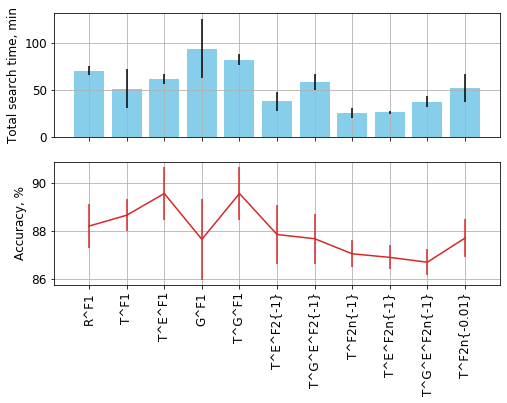

In [221]:
color_palette = ['skyblue','lightpink','brown', 'blue', 'lightgreen', 'magenta', 'grey', 'orange', 'green']


fig, axs = plt.subplots(2, 1, sharex=True, figsize=(8, 5))
# Remove horizontal space between axes
#fig.subplots_adjust(hspace=1)

# Plot each graph, and manually set the y tick values
color = 'skyblue'
axs[0].bar(names, total_train_time_mean, yerr=total_train_time_std, color=color)
axs[0].tick_params(axis='y', labelsize = 12)
axs[0].set_ylabel('Total search time, min', fontsize=12 )

color = 'tab:red'
axs[1].errorbar(names, accuracy_mean,accuracy_std, color=color)
axs[1].tick_params(axis='y', labelsize = 12)
axs[1].set_ylabel('Accuracy, %', fontsize=12 )


axs[1].set_xticklabels(names, rotation=90, size = 12)
axs[0].set_xticklabels(names, rotation=90, size = 12)

axs[0].grid()
axs[1].grid()

plt.savefig('stage1_stat.png', dpi = 300, bbox_inches="tight")
plt.show()

In [227]:

accuracy_mean = [np.mean([86.8,88, 89, 89,88.2, 88.2, 89.8, 88.4,87.8, 89.8, 89.8, 90.8,85, 87.8, 89.6, 
                          88.2,87.8, 89.8, 89.8, 90.8]), 
            np.mean([89, 86, 88.4, 88.2, 87.4, 88.2, 89.6, 86, 88.6,89, 86.8, 86, 87.6, 86.8, 89, 87.6]),
            np.mean([86.4, 87.6, 87.6, 86.6, 86.2, 87.6, 86.8, 87, 87.4, 86.4, 87, 86]),
            np.mean([87.8, 87.6, 88.8, 86.6])]

total_train_time_mean = [np.mean([69.37, 77, 65,79.29, 30.45, 43.98,55.25, 68.11, 61.77,102, 127.64, 
                                  52.21,73.86, 86.12, 87.1]), 
            np.mean([39.85, 55.93, 27.87, 38.37, 27.3,45.68, 47.26, 62.81, 62.81, 63.12, 69.2]),
            np.mean([18.52, 26.91, 21.94, 33.02,26.16, 27.75, 22.6, 27.49,35.8, 40.58, 45.7, 28.6]),
            np.mean([43.2, 41.6, 45.7, 77.65])]

parameters_mean = [np.mean([528, 42, 47, 113,13, 70, 15, 108,517, 118, 3222, 63,55, 19, 13460,
                            6435,517, 118, 3222, 63]), 
            np.mean([50, 27, 232, 29, 42, 29, 57, 33,1074, 264, 169, 128, 812, 102, 204, 455]),
            np.mean([191, 115, 139, 835,71, 86, 127, 452,62, 80, 21, 927]),
            np.mean([35, 107, 269, 1015])]       
                   
                   
predict_time_mean = [np.mean([0.28, 0.12, 0.101,1.444, 0.19, 0.06,0.43, 0.11, 0.96,0.219, 0.24, 
                              0.18,0.307, 0.28, 0.19]), 
            np.mean([0.41, 0.156, 0.436, 0.25, 0.084,0.367, 0.164, 0.24, 0.228, 0.18, 0.42]), 
            np.mean([0.31, 0.082, 0.2, 0.13,0.56, 0.183, 0.36, 0.26,0.078, 0.21, 0.05, 0.14]),
            np.mean([0.12, 0.17, 0.14, 0.36])]           


accuracy_std = [np.std([86.8,88, 89, 89,88.2, 88.2, 89.8, 88.4,87.8, 89.8, 89.8, 90.8,85, 87.8, 89.6, 
                          88.2,87.8, 89.8, 89.8, 90.8]), 
            np.std([89, 86, 88.4, 88.2, 87.4, 88.2, 89.6, 86, 88.6,89, 86.8, 86, 87.6, 86.8, 89, 87.6]),
            np.std([86.4, 87.6, 87.6, 86.6, 86.2, 87.6, 86.8, 87, 87.4, 86.4, 87, 86]),
            np.std([87.8, 87.6, 88.8, 86.6])]

total_train_time_std = [np.std([69.37, 77, 65,79.29, 30.45, 43.98,55.25, 68.11, 61.77,102, 127.64, 
                                  52.21,73.86, 86.12, 87.1]), 
            np.std([39.85, 55.93, 27.87, 38.37, 27.3,45.68, 47.26, 62.81, 62.81, 63.12, 69.2]),
            np.std([18.52, 26.91, 21.94, 33.02,26.16, 27.75, 22.6, 27.49,35.8, 40.58, 45.7, 28.6]),
            np.std([43.2, 41.6, 45.7, 77.65])]

parameters_std = [np.std([528, 42, 47, 113,13, 70, 15, 108,517, 118, 3222, 63,55, 19, 13460,
                            6435,517, 118, 3222, 63]), 
            np.std([50, 27, 232, 29, 42, 29, 57, 33,1074, 264, 169, 128, 812, 102, 204, 455]),
            np.std([191, 115, 139, 835,71, 86, 127, 452,62, 80, 21, 927]),
            np.std([35, 107, 269, 1015])]      

predict_time_std= [np.std([0.28, 0.12, 0.101,1.444, 0.19, 0.06,0.43, 0.11, 0.96,0.219, 0.24, 
                              0.18,0.307, 0.28, 0.19]), 
            np.std([0.41, 0.156, 0.436, 0.25, 0.084,0.367, 0.164, 0.24, 0.228, 0.18, 0.42]), 
            np.std([0.31, 0.082, 0.2, 0.13,0.56, 0.183, 0.36, 0.26,0.078, 0.21, 0.05, 0.14]),
            np.std([0.12, 0.17, 0.14, 0.36])]           



In [228]:
parameters_std

[3185.2462679516634, 295.0082030109502, 297.937306977305, 389.51604588257976]

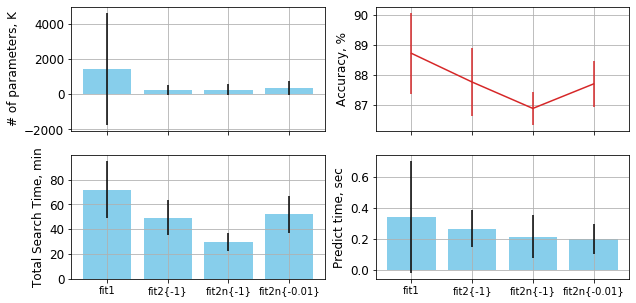

In [229]:
names_params = ['fit1', 'fit2{-1}', 'fit2n{-1}', 'fit2n{-0.01}']

fig, axs = plt.subplots(2, 2, sharex=True, figsize=(10, 5))
# Remove horizontal space between axes
#fig.subplots_adjust(hspace=1)

# Plot each graph, and manually set the y tick values
color = 'skyblue'
axs[0,0].bar(names_params, parameters_mean, yerr=parameters_std, color=color)
axs[0,0].tick_params(axis='y', labelsize = 12)
axs[0,0] .set_ylabel('# of parameters, K', fontsize=12 )


axs[1,1].bar(names_params, predict_time_mean,yerr=predict_time_std,color=color)
axs[1,1].tick_params(axis='y', labelsize = 12)
axs[1,1].set_ylabel('Predict time, sec', fontsize=12 )


axs[1,0].bar(names_params, total_train_time_mean,yerr=total_train_time_std, color=color)
axs[1,0].tick_params(axis='y', labelsize = 12)
axs[1,0].set_ylabel('Total Search Time, min', fontsize=12 )

color = 'tab:red'
axs[0, 1].set_ylabel('Accuracy, %', fontsize=12 )
axs[0, 1].errorbar(names_params, accuracy_mean, accuracy_std, color=color)
axs[0, 1].tick_params(axis='y',  labelsize = 12)

axs[1, 0].grid()
axs[0, 1].grid()
axs[0, 0].grid()
axs[1, 1].grid()
plt.savefig('stage1_fit.png', dpi = 300, bbox_inches="tight")
plt.show()

In [207]:
accuracy3_mean = [np.mean([92.1, 92.5, 91.9, 91.8]), 
            np.mean([93.1, 92.9, 92.8, 92.6]), 
            np.mean([93, 92.7, 92.1, 93]), 
            np.mean([92.2, 92.5, 91.8, 91.9]), 
            np.mean([92.5, 92, 91, 91.8]), 
            np.mean([91.8, 91.6, 91.6, 91.3, 91]),
            np.mean([92.2, 92.3, 91.6, 91.1, 92.6]),
            np.mean([92, 92.5, 91.8, 92.2]),
            np.mean([92, 92.6, 92.4, 92]), 
            np.mean([92.5, 92, 91.8, 92.5]),
            np.mean([91, 92, 92.9, 93.2])]

total_train_time3_mean = [np.mean([35.82, 36.2, 34.53, 30.35]), 
             np.mean([33.54, 32.5, 49.45, 45.2]), 
             np.mean([33.4, 34.2, 30.1, 53.9]), 
             np.mean([26, 28.6, 29.24, 34.64]), 
             np.mean([32.73, 44.3, 39.33, 36.34]), 
             np.mean([23, 32.28, 23.4, 22.87, 26.05]), 
             np.mean([29.75, 27.58, 27.3, 28.73, 31.94]),
             np.mean([21.1, 18.17, 23.6, 27.2]),
             np.mean([22.96, 31.93, 26.05, 30.18]), 
             np.mean([26.2, 30.47, 30.1, 34.77]),
             np.mean([27.93, 43.22, 51.3, 57.1])]   

parameters3_mean = [np.mean([175, 225, 1189, 263]), 
             np.mean([1700, 419, 827, 248]), 
             np.mean([699, 3400, 248, 416]), 
             np.mean([42, 464, 816, 458]), 
             np.mean([459, 371, 626, 1083]), 
             np.mean([278, 414, 406, 102, 426]), 
             np.mean([829, 522, 343, 148, 685]),
             np.mean([211, 384, 58, 832]),
             np.mean([3222, 258, 89, 410]), 
             np.mean([73, 6671, 1641, 818]),
             np.mean([858, 583, 6684, 1225])]       

predict_time3_mean = [np.mean([0.62, 0.525, 0.56, 0.652]), 
            np.mean([0.49, 0.55, 0.6, 0.52]), 
            np.mean([0.652, 0.54, 0.52, 0.64]), 
            np.mean([0.49, 0.54, 0.56, 0.485]), 
            np.mean([0.475, 0.62, 0.726, 0.574]), 
            np.mean([0.468, 0.386, 0.364, 0.41, 0.4]), 
            np.mean([0.6, 0.87, 0.52, 0.48, 0.52, 0.54]),
            np.mean([0.41, 0.75, 0.41, 0.43]),
            np.mean([0.42, 0.67, 0.56, 0.6]), 
            np.mean([0.47, 0.8, 0.36, 0.46]),
            np.mean([0.45, 0.63, 0.73, 0.59])] 

accuracy3_std = [np.std([92.1, 92.5, 91.9, 91.8]), 
            np.std([93.1, 92.9, 92.8, 92.6]), 
            np.std([93, 92.7, 92.1, 93]), 
            np.std([92.2, 92.5, 91.8, 91.9]),  
            np.std([92.5, 92, 91, 91.8]), 
            np.std([91.8, 91.6, 91.6, 91.3, 91]),
            np.std([92.2, 92.3, 91.6, 91.1, 92.6]),
            np.std([92, 92.5, 91.8, 92.2]),
            np.std([92, 92.6, 92.4, 92]), 
            np.std([92.5, 92, 91.8, 92.5]),
            np.std([91, 92, 92.9, 93.2])]

total_train_time3_std = [np.std([35.82, 36.2, 34.53, 30.35]), 
             np.std([33.54, 32.5, 49.45, 45.2]), 
             np.std([33.4, 34.2, 30.1, 53.9]), 
             np.std([26, 28.6, 29.24, 34.64]), 
             np.std([32.73, 44.3, 39.33, 36.34]), 
             np.std([23, 32.28, 23.4, 22.87, 26.05]), 
             np.std([29.75, 27.58, 27.3, 28.73, 31.94]),
             np.std([21.1, 18.17, 23.6, 27.2]),
             np.std([22.96, 31.93, 26.05, 30.18]), 
             np.std([26.2, 30.47, 30.1, 34.77]),
             np.std([27.93, 43.22, 51.3, 57.1])]   

parameters3_std = [np.std([175, 225, 1189, 263]), 
             np.std([1700, 419, 827, 248]), 
             np.std([699, 3400, 248, 416]), 
             np.std([42, 464, 816, 458]), 
             np.std([459, 371, 626, 1083]), 
             np.std([278, 414, 406, 102, 426]),  
             np.std([829, 522, 343, 148, 685]),
             np.std([[211, 384, 58, 832]]),
             np.std([3222, 258, 89, 410]), 
             np.std([73, 6671, 1641, 818]),
             np.std([858, 583, 6684, 1225])] 

predict_time3_std = [np.std([0.62, 0.525, 0.56, 0.652]), 
            np.std([0.49, 0.55, 0.6, 0.52]), 
            np.std([0.652, 0.54, 0.52, 0.64]), 
            np.std([0.49, 0.54, 0.56, 0.485]), 
            np.std([0.475, 0.62, 0.726, 0.574]), 
            np.std([0.468, 0.386, 0.364, 0.41, 0.4]), 
            np.std([0.6, 0.87, 0.52, 0.48, 0.52, 0.54]),
            np.std([0.41, 0.75, 0.41, 0.43]),
            np.std([0.42, 0.67, 0.56, 0.6]), 
            np.std([0.47, 0.8, 0.36, 0.46]),
            np.std([0.45, 0.63, 0.73, 0.59])] 

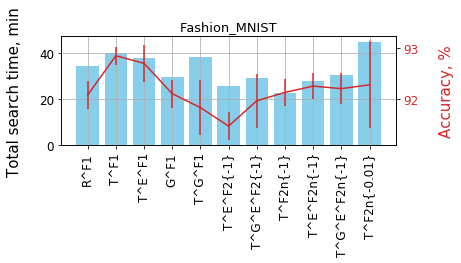

In [208]:
color_palette = ['skyblue','lightpink','brown', 'blue', 'lightgreen', 'magenta', 'grey', 'orange', 'green']

fig, axs = plt.subplots(1, 1, sharex=True, figsize=(6, 2))
# Remove horizontal space between axes
#fig.subplots_adjust(hspace=1)

# Plot each graph, and manually set the y tick values
color = 'skyblue'
axs.set_title('Fashion_MNIST', fontsize=13)
axs.bar(names, total_train_time3_mean, color=color)
axs.tick_params(axis='y', labelsize = 12)

ax2 = axs.twinx()

color = 'tab:red'
ax2.errorbar(names, accuracy3_mean, accuracy3_std, color=color)
ax2.tick_params(axis='y', labelcolor=color, labelsize = 12)

fig.text(1, 0.5, 'Accuracy, %', va='center', rotation='vertical', fontsize=15, color = color)

fig.text(0, 0.5, 'Total search time, min', va='center', rotation='vertical', fontsize=15 )

axs.set_xticklabels(names, rotation=90, size = 12)

axs.grid()
plt.show()

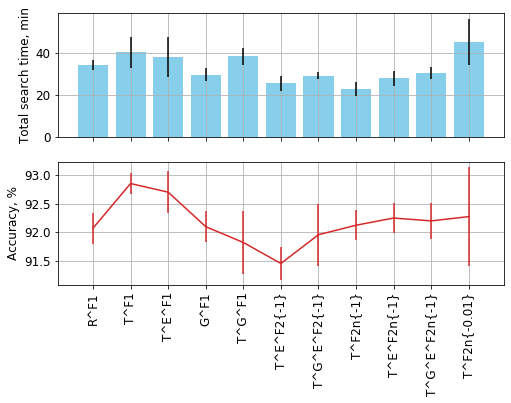

In [209]:
color_palette = ['skyblue','lightpink','brown', 'blue', 'lightgreen', 'magenta', 'grey', 'orange', 'green']


fig, axs = plt.subplots(2, 1, sharex=True, figsize=(8, 5))
# Remove horizontal space between axes
#fig.subplots_adjust(hspace=1)

# Plot each graph, and manually set the y tick values
color = 'skyblue'
axs[0].bar(names, total_train_time3_mean, yerr=total_train_time3_std, color=color)
axs[0].tick_params(axis='y', labelsize = 12)
axs[0].set_ylabel('Total search time, min', fontsize=12 )

color = 'tab:red'
axs[1].errorbar(names, accuracy3_mean,accuracy3_std, color=color)
axs[1].tick_params(axis='y', labelsize = 12)
axs[1].set_ylabel('Accuracy, %', fontsize=12 )

axs[1].set_xticklabels(names, rotation=90, size = 12)

axs[0].grid()
axs[1].grid()
plt.savefig('stage2_stat.png', dpi = 300, bbox_inches="tight")
plt.show()

In [230]:
accuracy3_mean = [np.mean([92.1, 92.5, 91.9, 91.8,93.1, 92.9, 92.8, 92.6,93, 92.7, 92.1, 93,92.2, 92.5, 
                           91.8, 91.9,92.5, 92, 91, 91.8]), 
            np.mean([91.8, 91.6, 91.6, 91.3, 91,92.2, 92.3, 91.6, 91.1, 92.6]),
            np.mean([92, 92.5, 91.8, 92.2,92, 92.6, 92.4, 92,92.5, 92, 91.8, 92.5]),
            np.mean([91, 92, 92.9, 93.2])]

total_train_time3_mean = [np.mean([35.82, 36.2, 34.53, 30.35,33.54, 32.5, 49.45, 45.2,33.4, 34.2, 
                                   30.1, 53.9,26, 28.6, 29.24, 34.64,32.73, 44.3, 39.33, 36.34]), 
             np.mean([23, 32.28, 23.4, 22.87, 26.05,29.75, 27.58, 27.3, 28.73, 31.94]),
             np.mean([21.1, 18.17, 23.6, 27.2,22.96, 31.93, 26.05, 30.18,26.2, 30.47, 30.1, 34.77]),
             np.mean([27.93, 43.22, 51.3, 57.1])]   

parameters3_mean = [np.mean([175, 225, 1189, 263,1700, 419, 827, 248,699, 3400, 248, 416,42, 
                             464, 816, 458,459, 371, 626, 1083]), 
             np.mean([278, 414, 406, 102, 426,829, 522, 343, 148, 685]),
             np.mean([211, 384, 58, 832,3222, 258, 89, 410,73, 6671, 1641, 818]),
             np.mean([858, 583, 6684, 1225])]       

predict_time3_mean = [np.mean([0.62, 0.525, 0.56, 0.652,0.49, 0.55, 0.6, 0.52,0.652, 0.54, 0.52, 
                               0.64,0.49, 0.54, 0.56, 0.485,0.475, 0.62, 0.726, 0.574]), 
            np.mean([0.468, 0.386, 0.364, 0.41, 0.4,0.6, 0.87, 0.52, 0.48, 0.52, 0.54]),
            np.mean([0.41, 0.75, 0.41, 0.43,0.42, 0.67, 0.56, 0.6,0.47, 0.8, 0.36, 0.46]),
            np.mean([0.45, 0.63, 0.73, 0.59])] 


accuracy3_std = [np.std([92.1, 92.5, 91.9, 91.8,93.1, 92.9, 92.8, 92.6,93, 92.7, 92.1, 93,92.2, 92.5, 
                           91.8, 91.9,92.5, 92, 91, 91.8]), 
            np.std([91.8, 91.6, 91.6, 91.3, 91,92.2, 92.3, 91.6, 91.1, 92.6]),
            np.std([92, 92.5, 91.8, 92.2,92, 92.6, 92.4, 92,92.5, 92, 91.8, 92.5]),
            np.std([91, 92, 92.9, 93.2])]

total_train_time3_std = [np.std([35.82, 36.2, 34.53, 30.35,33.54, 32.5, 49.45, 45.2,33.4, 34.2, 
                                   30.1, 53.9,26, 28.6, 29.24, 34.64,32.73, 44.3, 39.33, 36.34]), 
             np.std([23, 32.28, 23.4, 22.87, 26.05,29.75, 27.58, 27.3, 28.73, 31.94]),
             np.std([21.1, 18.17, 23.6, 27.2,22.96, 31.93, 26.05, 30.18,26.2, 30.47, 30.1, 34.77]),
             np.std([27.93, 43.22, 51.3, 57.1])]   

parameters3_std = [np.std([175, 225, 1189, 263,1700, 419, 827, 248,699, 3400, 248, 416,42, 
                             464, 816, 458,459, 371, 626, 1083]), 
             np.std([278, 414, 406, 102, 426,829, 522, 343, 148, 685]),
             np.std([211, 384, 58, 832,3222, 258, 89, 410,73, 6671, 1641, 818]),
             np.std([858, 583, 6684, 1225])]       

predict_time3_std = [np.std([0.62, 0.525, 0.56, 0.652,0.49, 0.55, 0.6, 0.52,0.652, 0.54, 0.52, 
                               0.64,0.49, 0.54, 0.56, 0.485,0.475, 0.62, 0.726, 0.574]), 
            np.std([0.468, 0.386, 0.364, 0.41, 0.4,0.6, 0.87, 0.52, 0.48, 0.52, 0.54]),
            np.std([0.41, 0.75, 0.41, 0.43,0.42, 0.67, 0.56, 0.6,0.47, 0.8, 0.36, 0.46]),
            np.std([0.45, 0.63, 0.73, 0.59])] 

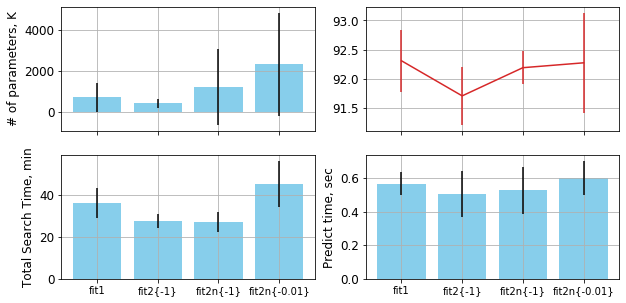

In [233]:
names_params = ['fit1', 'fit2{-1}', 'fit2n{-1}', 'fit2n{-0.01}']


fig, axs = plt.subplots(2, 2, sharex=True, figsize=(10, 5))
# Remove horizontal space between axes
#fig.subplots_adjust(hspace=1)

# Plot each graph, and manually set the y tick values
color = 'skyblue'
axs[0,0].bar(names_params, parameters3_mean, yerr=parameters3_std,color=color)
axs[0,0].tick_params(axis='y', labelsize = 12)
axs[0,0] .set_ylabel('# of parameters, K', fontsize=12 )


axs[1,1].bar(names_params, predict_time3_mean,yerr=predict_time3_std, color=color)
axs[1,1].tick_params(axis='y', labelsize = 12)
axs[1,1].set_ylabel('Predict time, sec', fontsize=12 )


axs[1,0].bar(names_params, total_train_time3_mean,yerr=total_train_time3_std,color=color)
axs[1,0].tick_params(axis='y', labelsize = 12)
axs[1,0].set_ylabel('Total Search Time, min', fontsize=12 )

color = 'tab:red'
axs[0, 1].errorbar(names_params, accuracy3_mean, accuracy3_std, color=color)
axs[0, 1].tick_params(axis='y',  labelsize = 12)

axs[1, 0].grid()
axs[0, 1].grid()
axs[0, 0].grid()
axs[1, 1].grid()

plt.savefig('stage2_fit.png', dpi = 300, bbox_inches="tight")
plt.show()

In [232]:
names4 = ['fit1', 'fit2{1, -0.1}', 'fit2{1, -0.2}', 'fit2{1, -0.5}', 'fit2{1, -1}', 'fit2{1, -5}', 'fit2{1, -10}', 
          'fit3{1, -0.001}', 'fit3{1, -0.002}', 'fit3{1, -0.005}', 'fit3{1, -0.1}', 'fit3{1, -0.5}',]

accuracy4_mean = [np.mean([85, 86]), 
            np.mean([89.8, 89.6, 86.6]), 
            np.mean([87.8, 87.6, 90]), 
            np.mean([89.6, 85.4, 85.4]), 
            np.mean([87.8, 88, 87.4]), 
            np.mean([88.4, 88.6, 86.4]), 
            np.mean([86.8, 86, 89.4]),
            np.mean([85.8, 88.4, 89.2]),
            np.mean([90.2, 88.6, 88.6]),
            np.mean([86.8, 90.2, 85.2]), 
            np.mean([88.2, 87, 87.2]),
            np.mean([88.8, 87.2, 87.8])]

total_train_time4_mean = [np.mean([7.77, 7.36]), 
            np.mean([7.46, 7.63, 7.02]), 
            np.mean([7.27, 8.07, 7.27]), 
            np.mean([8.66, 8.29, 8.06]), 
            np.mean([8.12, 8.22, 7.3]), 
            np.mean([7.34, 8.1, 7.56]), 
            np.mean([7.13, 8.81, 7.12]),
            np.mean([8.1, 9.55, 8.98]),
            np.mean([9.38, 9.49, 10.7]),
            np.mean([9.95, 10.28, 10.68]), 
            np.mean([8.53, 9.8, 9.79]),
            np.mean([7.38, 8.6, 10.32])]

parameters4_mean = [np.mean([156, 218]), 
            np.mean([72, 221, 1635]), 
            np.mean([132, 218, 13]), 
            np.mean([69, 70, 264]), 
            np.mean([86, 137, 408]), 
            np.mean([153, 78, 3223]), 
            np.mean([109,32, 135]),
            np.mean([164, 140, 106]),
            np.mean([1622, 109, 245]), 
            np.mean([147, 59, 466]),
            np.mean([177, 82, 101]), 
            np.mean([72, 925, 19])]

accuracy4_std = [np.std([85, 86]), 
            np.std([89.8, 89.6, 86.6]), 
            np.std([87.8, 87.6, 90]), 
            np.std([89.6, 85.4, 85.4]), 
            np.std([87.8, 88, 87.4]), 
            np.std([88.4, 88.6, 86.4]), 
            np.std([86.8, 86, 89.4]),
            np.std([85.8, 88.4, 89.2]),
            np.std([90.2, 88.6, 88.6]),
            np.std([86.8, 90.2, 85.2]), 
            np.std([88.2, 87, 87.2]),
            np.std([88.8, 87.2, 87.8])]

total_train_time4_std = [np.std([7.77, 7.36]), 
            np.std([7.46, 7.63, 7.02]), 
            np.std([7.27, 8.07, 7.27]), 
            np.std([8.66, 8.29, 8.06]), 
            np.std([8.12, 8.22, 7.3]), 
            np.std([7.34, 8.1, 7.56]), 
            np.std([7.13, 8.81, 7.12]),
            np.std([8.1, 9.55, 8.98]),
            np.std([9.38, 9.49, 10.7]),
            np.std([9.95, 10.28, 10.68]), 
            np.std([8.53, 9.8, 9.79]),
            np.std([7.38, 8.6, 10.32])]

parameters4_std = [np.std([156, 218]), 
            np.std([72, 221, 1635]), 
            np.std([132, 218, 13]), 
            np.std([69, 70, 264]), 
            np.std([86, 137, 408]), 
            np.std([153, 78, 3223]), 
            np.std([109,32, 135]),
            np.std([164, 140, 106]),
            np.std([1622, 109, 245]), 
            np.std([147, 59, 466]),
            np.std([177, 82, 101]), 
            np.std([72, 925, 19])]

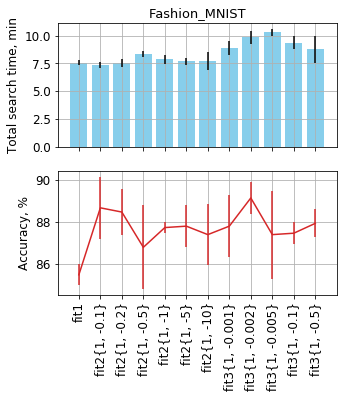

In [213]:
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(5, 5))
# Remove horizontal space between axes
#fig.subplots_adjust(hspace=1)

# Plot each graph, and manually set the y tick values
color = 'skyblue'
axs[0].set_title('Fashion_MNIST', fontsize=13)
axs[0].bar(names4, total_train_time4_mean, yerr=total_train_time4_std, color=color)
axs[0].tick_params(axis='y', labelsize = 12)
axs[0].set_ylabel('Total search time, min', fontsize=12 )

color = 'tab:red'
axs[1].errorbar(names4, accuracy4_mean,accuracy4_std, color=color)
axs[1].tick_params(axis='y', labelsize = 12)
axs[1].set_ylabel('Accuracy, %', fontsize=12 )

axs[1].set_xticklabels(names4, rotation=90, size = 12)

axs[0].grid()
axs[1].grid()

plt.show()